##                                                주제 : 서울시 자동차 교통 사고량 예측 모델 

|     |    변수명           | 변수설명                    | 단위     | 특성       |
|-----|-------------------|-----------------------------|----------|------------|
| y   | accident          | 한 달간 일어나는 교통사고수 | 일       | real       |
| x1  | taxi_driver       | 당월 일반택시 운전자수      | 명       | real       |
| x2  | gasolin           | 한 달 가솔린 소비량         | 1000배럴 | real       |
| x3  | diesel            | 한 달 디젤 소비량           | 1000배럴 | real       |
| x4  | LPG               | 한 달 LPG 소비량            | 1000배럴 | real       |
| x5  | temp              | 한 달 평균 기온             | 섭씨     | real       |
| x6  | temp_max          | 한 달 평균 최고기온         | 섭씨     | real       |
| x7  | temp_min          | 한 달 평균 최저기온         | 섭씨     | real       |
| x8  | temp_dif          | 한 달 평균 일교차           | 섭씨     | real       |
| x9  | rainfall          | 한 달 평균 강수량           | mm       | real       |
| x10 | humidity          | 한 달 평균 습도             | %        | real       |
| x11 | humidity_min      | 한 달 평균 최저습도         | %        | real       |
| x12 | dew_point         | 한 달 평균 이슬점           | 섭씨     | real       |
| x13 | sun               | 한 달간 일조시간            | 시간     | real       |
| x14 | wind_spd_mean     | 한 달 평균 풍속             | m/s      | real       |
| x15 | wind_spd_max      | 한 달 평균 최고풍속         | m/s      | real       |
| x16 | rainfall_day      | 한 달간 강수일              | 일       | int (0~31) |
| x17 | frost             | 한 달간 서리 내린 날 수     | 일       | int (0~31) |
| x18 | fog               | 한 달간 안개낀 날 수        | 일       | int (0~31) |
| x19 | snow              | 한 달간 눈 온 날 수         | 일       | int (0~31) |
| x20 | yellow_sand       | 한 달간 황사 온 날 수       | 일       | int (0~31) |
| x21 | thunderbolts      | 한 달간 번개친 날 수        | 일       | int (0~31) |
| x22 | weather_condition | 한 달간 흐린 날 수          | 일       | int (0~31) |
| x23 | total_population  | 당월 인구수                 | 명       | int        |
| x24 | over_65           | 당월 65세이상 인구수        | 명       | int        |
| x25 | total_vehicle     | 당월 자동차수               | 대       | int        |
| x26 | sedan             | 당월 승용차수               | 대       | int        |
| x27 | van               | 당월 승합차수               | 대       | int        |
| x28 | truck             | 당월 화물차수               | 대       | int        |
| x29 | special_car       | 당월 특수차수               | 대       | int        |
| x30 | bicycle           | 당월 2륜차수                | 대       | int        |

In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.preprocessing import scale, robust_scale, minmax_scale, maxabs_scale
import matplotlib.pylab as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [10]:
df1_sci = pd.read_excel('teamproject_data.xlsx')
df11 = scale(df1_sci)
df1 = pd.DataFrame(data = df11, columns = df1_sci.columns)
print(df1)

    taxi_driver   gasolin    Diesel       LPG      days      temp  temp_max  \
0      1.594065  0.427194 -1.090991  2.436058  0.687746 -1.924362 -1.988751   
1      1.649145 -0.667240 -1.290736  0.086486 -2.953264 -1.113291 -1.099193   
2      2.212708 -0.317021 -1.096698  2.624526  0.687746 -0.881557 -0.869630   
3      1.422779 -1.192569 -1.051042  1.531410 -0.525924 -0.196009 -0.171375   
4      1.182979  0.492860 -0.976850  0.991134  0.687746  0.499195  0.536445   
5      0.988855 -0.864238 -0.725742 -0.453790 -0.525924  0.895075  0.880789   
6      0.765848  3.010059 -0.486047  1.079086  0.687746  1.146120  1.014701   
7      0.507241  2.003180 -0.423270  1.506281  0.687746  1.261988  1.158178   
8      0.507241  0.405306 -0.628723  0.249825 -0.525924  0.875763  0.880789   
9      0.650314  0.164530  0.472731 -0.039160  0.687746  0.141937  0.182535   
10     0.670466  0.536638  0.392833 -0.566871 -0.525924 -0.196009 -0.257462   
11     0.910266  2.025068 -0.029486  2.222461  0.687

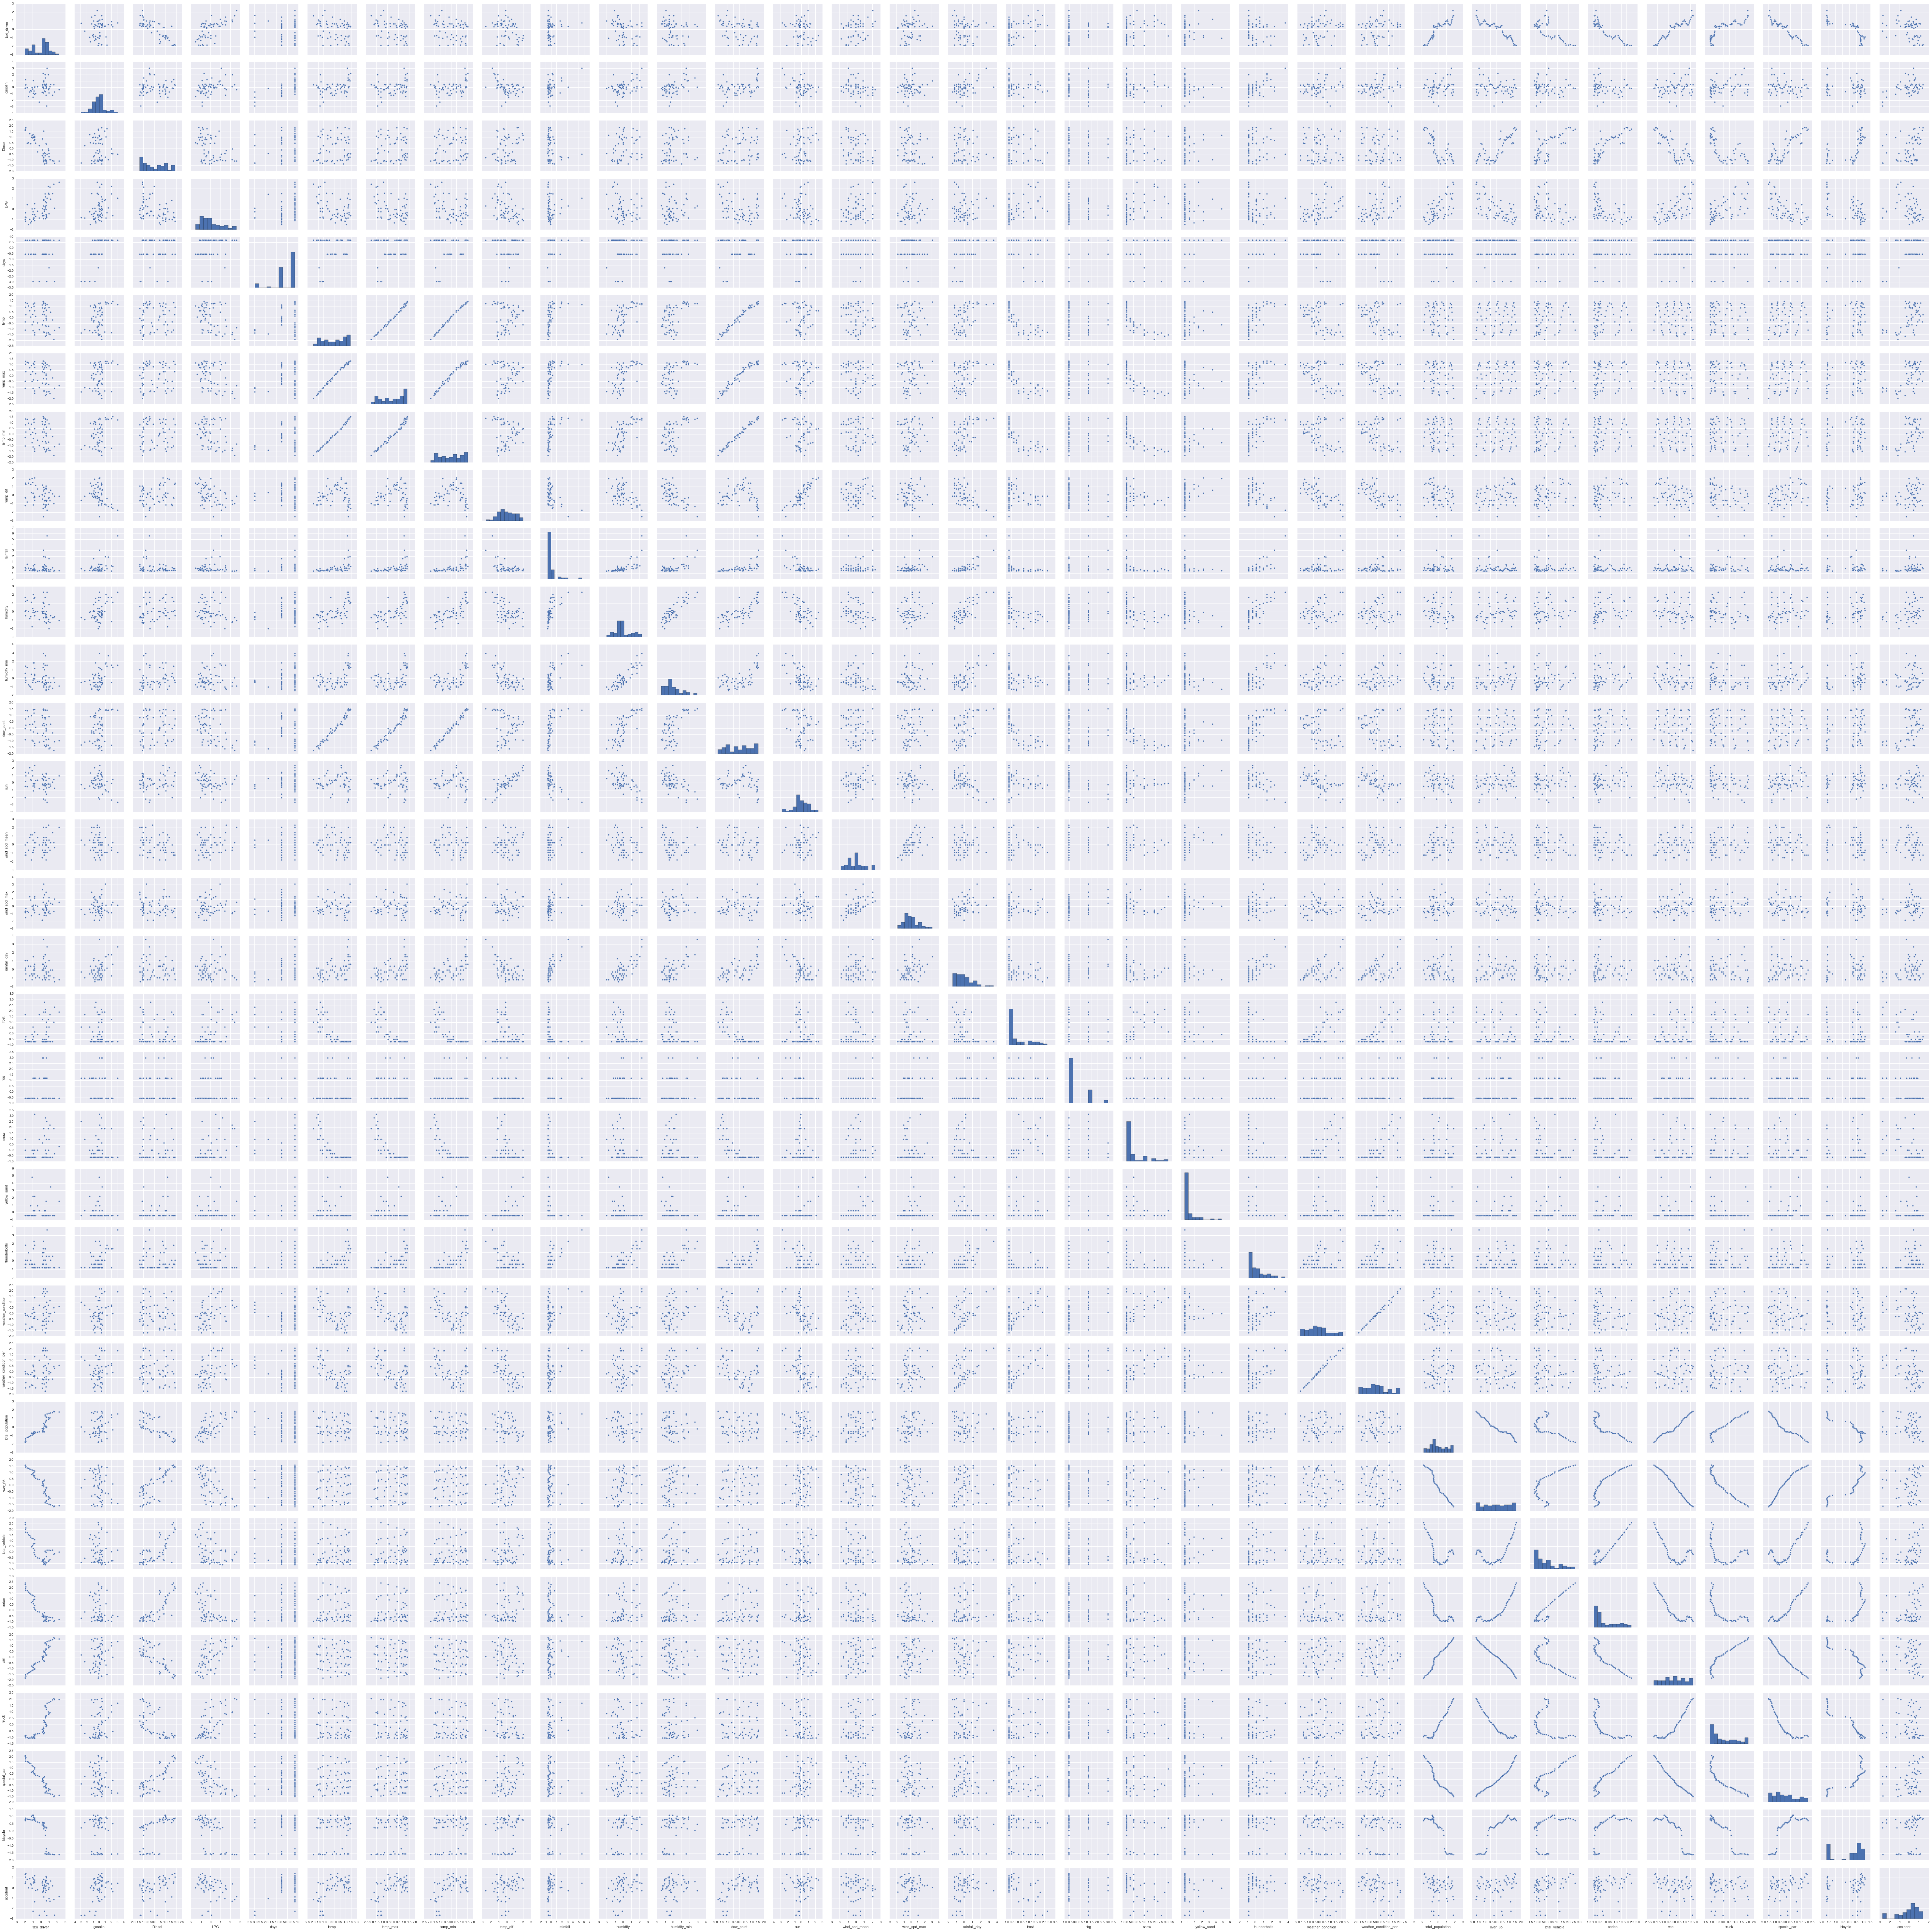

In [4]:
sns.pairplot(df1)
plt.show()

# ===========================================================

## - scikitlearn을 이용한 회귀 분석

In [32]:
dfX_accident = pd.DataFrame(df1_sci, columns=df1_sci.ix[:,:-1].columns)
dfy_accident = pd.DataFrame(df1_sci, columns=["accident"])
df_accident0 = pd.concat([dfX_accident, dfy_accident], axis=1)

In [33]:
df2 = scale(dfX_accident)
df3 = scale(dfy_accident)

In [34]:
model_accident = LinearRegression().fit(df2, df3)
print(model_accident.coef_)
print(model_accident.intercept_)

[[-0.67290814  0.27900526  0.36390645 -0.06173555  0.19409084 -5.42376104
   6.4353239   6.46701449 -0.04055522 -0.26317358  1.60937571 -0.21739762
  -8.36258013  0.17396235 -0.03863941  0.01123292  0.95783347  0.35378306
   0.22038687  0.46899163  0.06224886  0.13124695  1.01238765 -1.95935704
  -0.06137896 -3.42849072 -0.0923671   0.34966091 -1.49991604  0.0756617
   0.06881161  0.8823631 ]]
[ -2.10109506e-15]


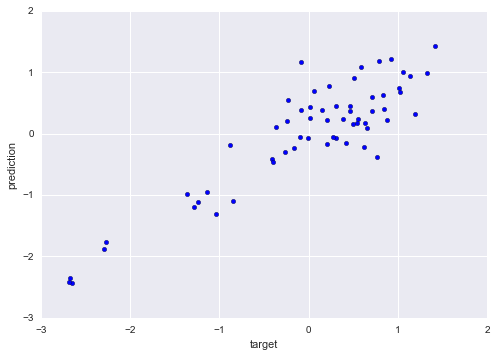

In [35]:
predictions = model_accident.predict(df2)
plt.scatter(df3, predictions)
plt.xlabel("target")
plt.ylabel("prediction")
plt.show()


# ===========================================================

## Statsmodels를 이용한 회귀 모형 분석 

In [29]:
df_accident = sm.add_constant(df1)
df_accident.tail()

,const,taxi_driver,gasolin,Diesel,LPG,days,temp,temp_max,temp_min,temp_dif,...,weather_condition_per,total_population,over_65,total_vehicle,sedan,van,truck,special_car,bicycle,accident
55,1,-1.837693,1.258964,1.762516,-0.365838,0.687746,1.310266,1.282525,1.340056,-0.375805,...,-0.189216,-1.359059,1.408107,1.761574,1.792911,-1.521510,-1.009939,1.614866,0.874871,0.587732
56,1,-1.839708,0.383417,1.865242,-1.182534,-0.525924,0.933697,1.024266,0.831052,1.417025,...,-1.432122,-1.501577,1.444338,2.022316,1.959100,-1.587260,-0.864029,1.810858,0.905345,1.056011
57,1,-1.797391,0.427194,1.836707,-0.830727,0.687746,0.267460,0.364272,0.187595,1.279115,...,-0.950179,-1.644096,1.480570,2.148665,2.062274,-1.668661,-0.841255,1.922131,0.857495,1.410471
58,1,-1.898147,-0.098134,1.614133,-1.031759,-0.525924,-0.369810,-0.448764,-0.282993,-1.203265,...,0.009479,-1.702883,1.533978,2.436159,2.272631,-1.734513,-0.822094,2.015701,0.810661,1.325921
59,1,-1.873965,-0.141912,1.728274,-0.755339,0.687746,-1.074669,-1.089628,-1.051301,-0.306850,...,1.079054,-1.761670,1.587386,2.589387,2.422441,-1.825466,-0.932665,2.091569,0.727792,0.460907


In [30]:
model_accident2 = sm.OLS(df_accident.ix[:, -1], df_accident.ix[:, :-1])
result_accident2 = model_accident2.fit()
result_accident2

In [31]:
print(result_accident2.summary())

                            OLS Regression Results                            
Dep. Variable:               accident   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.623
Method:                 Least Squares   F-statistic:                     4.368
Date:                Thu, 06 Oct 2016   Prob (F-statistic):           6.50e-05
Time:                        21:20:38   Log-Likelihood:                -35.549
No. Observations:                  60   AIC:                             131.1
Df Residuals:                      30   BIC:                             193.9
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------------
const                 -1.943e-